# 데이터 EDA

In [11]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('../data/shipping.csv')


1. 결측치 확인

In [3]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

2. 변수타입 확인

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


3. 종속변수 분포 확인
- imbalanced Problem 존재 유무 확인 (해당사항 없음, 있다면 SMOTE로 해결가능)

In [12]:
data['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

4. 독립변수 확인


- 범주형 변수   
   
    ID : 고객의 ID 번호
     
    Warehouse block - 창고 구역 (회사는 A, B, C, D, E와 같은 여러 구역으로 나누어진 큰 창고를 보유하고 있음)   
   
    Mode of shipment - 배송 방식 (회사는 선박, 항공기, 도로와 같은 다양한 방식으로 제품을 배송함)   
   
    Customer rating - 고객 평가 (1이 최저(최악)이고 5가 최고(최상)임)   
   
    Product importance - 제품 중요도 (회사는 제품을 낮음, 중간, 높음과 같은 다양한 기준으로 분류함)      
   
    Gender - 성별 (남성, 여성)     


- 연속형 변수   
    
    Customer care calls - 고객 상담 전화 수 (배송 문의를 위한 고객의 전화 횟수)   
   
    Cost of the product - 제품 가격 (미국 달러로 표시)    
   
    Prior purchases - 이전 구매 횟수     
   
    Discount offered - 제공된 할인 (해당 제품에 제공된 할인율)      
      
    Weight in gms - 제품 무게 (그램 단위)      


- 종속변수
   
    Reached on time -  목표 변수, 1은 제품이 제시간에 도착하지 않았음을 나타내고, 0은 제시간에 도착했음을 나타냄   


In [34]:
# 각 범주/연속형 변수 칼럼 새로운 변수에 정리
numerical = ['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases', 'Discount_offered', 'Weight_in_gms']
categorical = ['Warehouse_block', 'Mode_of_Shipment', 'Customer_rating', 'Product_importance']


4-1. 범주형 변수 분포 확인

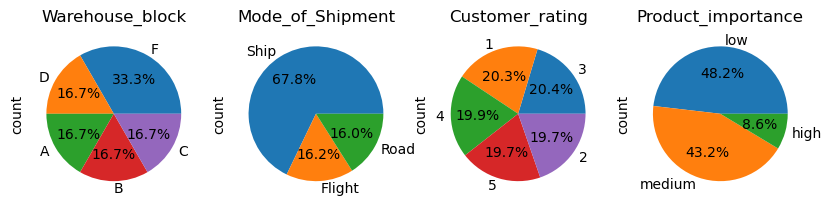

In [39]:
# 범주형 변수 분포 시각화 확인(파이차트)
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,4, figsize=(10,10))
for i, ax in enumerate(axes.flat):
    data[categorical[i]].value_counts().plot.pie(autopct='%1.1f%%', ax=ax)
    ax.set_title(categorical[i])


5. 연속형 변수 분포 확인

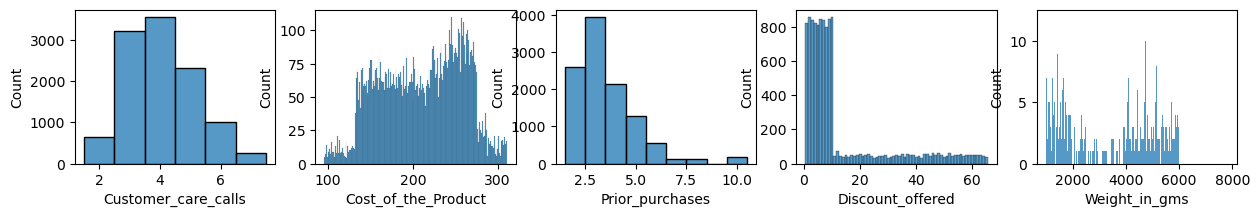

In [52]:
import seaborn as sns
fig, axes = plt.subplots(1,5 , figsize=(15,2))
for i, ax in enumerate(axes.flat):
    sns.histplot(data[numerical[i]], ax=ax, discrete=True)